In [1]:
%reload_ext autoreload
%autoreload 2

In [ ]:
from data_loader import ImageDataset2025
from torch.utils.data import DataLoader
from torchvision import transforms
from matplotlib import pyplot as plt
import torch

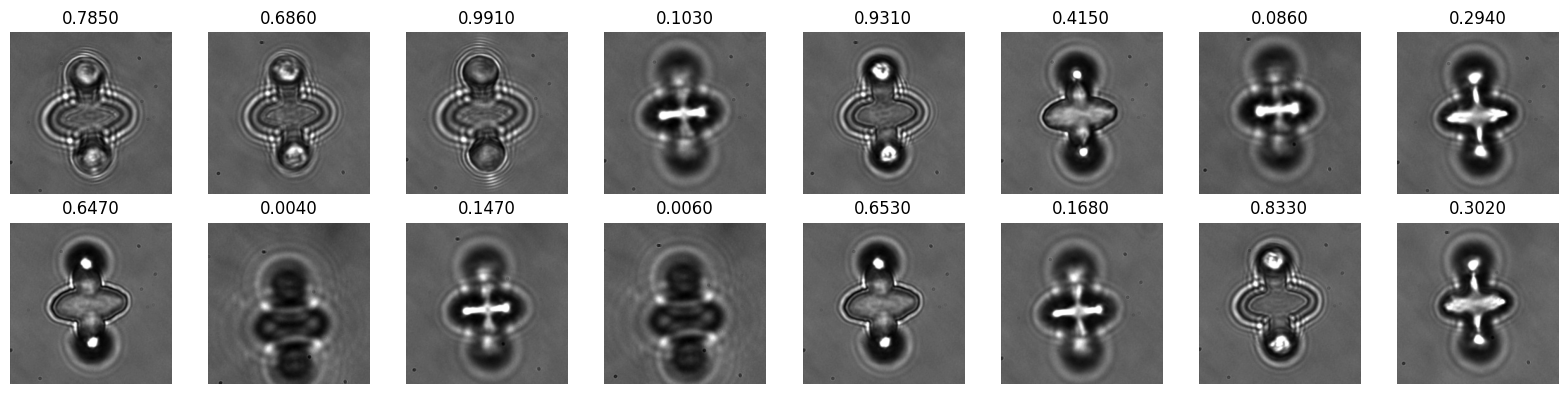

In [ ]:
transform_gray = transforms.Compose(
    [
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5]),
    ]
)

depth_dataset = ImageDataset2025(mode="depth", transform=transform_gray)


depth_dataloader = DataLoader(
    depth_dataset, batch_size=16, shuffle=False, num_workers=0
)
for images, labels in depth_dataloader:
    # unnormalize (Normalize was mean=0.5, std=0.5)
    imgs = images * 0.5 + 0.5
    imgs = imgs.clamp(0, 1).cpu()
    B = imgs.shape[0]

    cols = min(8, B)
    rows = (B + cols - 1) // cols
    plt.figure(figsize=(cols * 2, rows * 2))

    for i in range(B):
        ax = plt.subplot(rows, cols, i + 1)
        img = imgs[i].squeeze(0).numpy()  # grayscale
        ax.imshow(img, cmap="gray")
        # handle scalar or tensor labels uniformly
        lbl = (
            labels[i].item()
            if isinstance(labels[i], torch.Tensor)
            else float(labels[i])
        )
        ax.set_title(f"{lbl:.4f}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()
    break

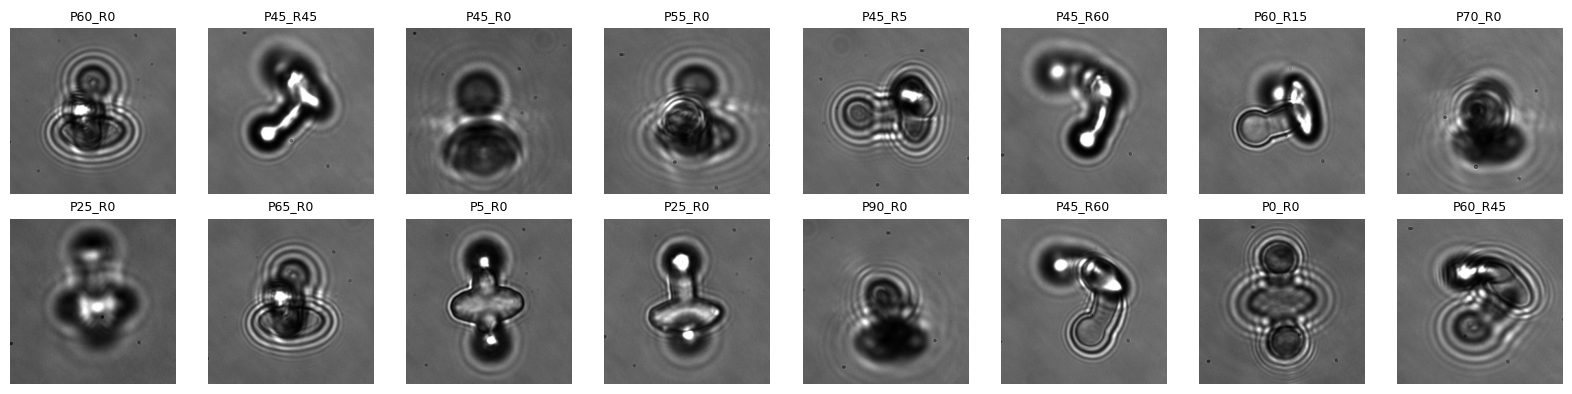

In [ ]:
pose_dataset = ImageDataset2025(mode="pose", transform=transform_gray)

pose_dataloader = DataLoader(pose_dataset, batch_size=16, shuffle=True)

for images, labels in pose_dataloader:
    # unnormalize (Normalize was mean=0.5, std=0.5)
    imgs = images * 0.5 + 0.5
    imgs = imgs.clamp(0, 1).cpu()
    B = imgs.shape[0]

    cols = min(8, B)
    rows = (B + cols - 1) // cols
    plt.figure(figsize=(cols * 2, rows * 2))

    for i in range(B):
        ax = plt.subplot(rows, cols, i + 1)
        img = imgs[i].squeeze(0).numpy()  # grayscale
        ax.imshow(img, cmap="gray")

        lbl_idx = labels[i].item()
        lbl_str = pose_dataset.idx_to_label[lbl_idx]

        ax.set_title(f"{lbl_str}", fontsize=9)
        ax.axis("off")

    plt.tight_layout()
    plt.show()
    break